# Lung Cancer dataset Analysis, Visualization and Prediction using Neural Networks

### Introduction
<div style="width:100%; height:100%; position:absolute; top:0; opacity:0.05;">
   <img src="https://media.istockphoto.com/id/1178554650/vector/vector-seamless-pattern-of-hand-drawn-textured-pink-breast-cancer-awareness-ribbon-women.jpg?s=612x612&w=0&k=20&c=dI9dJWWxrExo8cEHB-gRfMVe6aesnTvkbr5-uZGxX3c=" 
    alt="drawing"
    style="width: 100%; height: 100%"
/> 
</div>
<p>
Lung cancer is a type of cancer that begins in the lungs, typically in the cells lining the air passages. It is one of the most common and deadliest forms of cancer worldwide. Lung cancer can be broadly categorized into two main types: non-small cell lung cancer (NSCLC) and small cell lung cancer (SCLC), each with different characteristics and treatment approaches.  
</p>
<p>
NSCLC is the most prevalent form, accounting for approximately 85% of lung cancer cases. It tends to grow more slowly and is often detected at a later stage. SCLC is less common but more aggressive, often spreading rapidly to other parts of the body.  
</p>
Risk factors for lung cancer include smoking, exposure to secondhand smoke, environmental pollutants (such as radon and asbestos), family history, and certain genetic mutations. Symptoms of lung cancer may include a persistent cough, chest pain, shortness of breath, unexplained weight loss, and coughing up blood.  



<div style="width:100%; display:flex; margin-top:40px">
   <img src="https://newsnetwork.mayoclinic.org/n7-mcnn/7bcc9724adf7b803/uploads/2018/07/a-medical-illustration-of-lung-cancer-original-1024x576.jpg" 
    alt="drawing"
    style="width:600px; margin:auto"
    /> 
</div>



---

## Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset/cancer_dataset.csv')

---

## Data Analysis

Viewing the head of the dataset

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Printing information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

#### Checking the number of null values

In [5]:
df.isnull().sum()
# The number is 0, the dataset is already clean

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

#### Dropping unecessary columns

In [6]:
df.drop(["index", "Patient Id"], axis = 1, inplace = True)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


#### Replacing the Levels with values easier to work with

In [7]:
df=df.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


----

## Data Visualization

Setting Seaborn as the default plotting style and generating a heatmap of the correlation matrix of the DataFrame

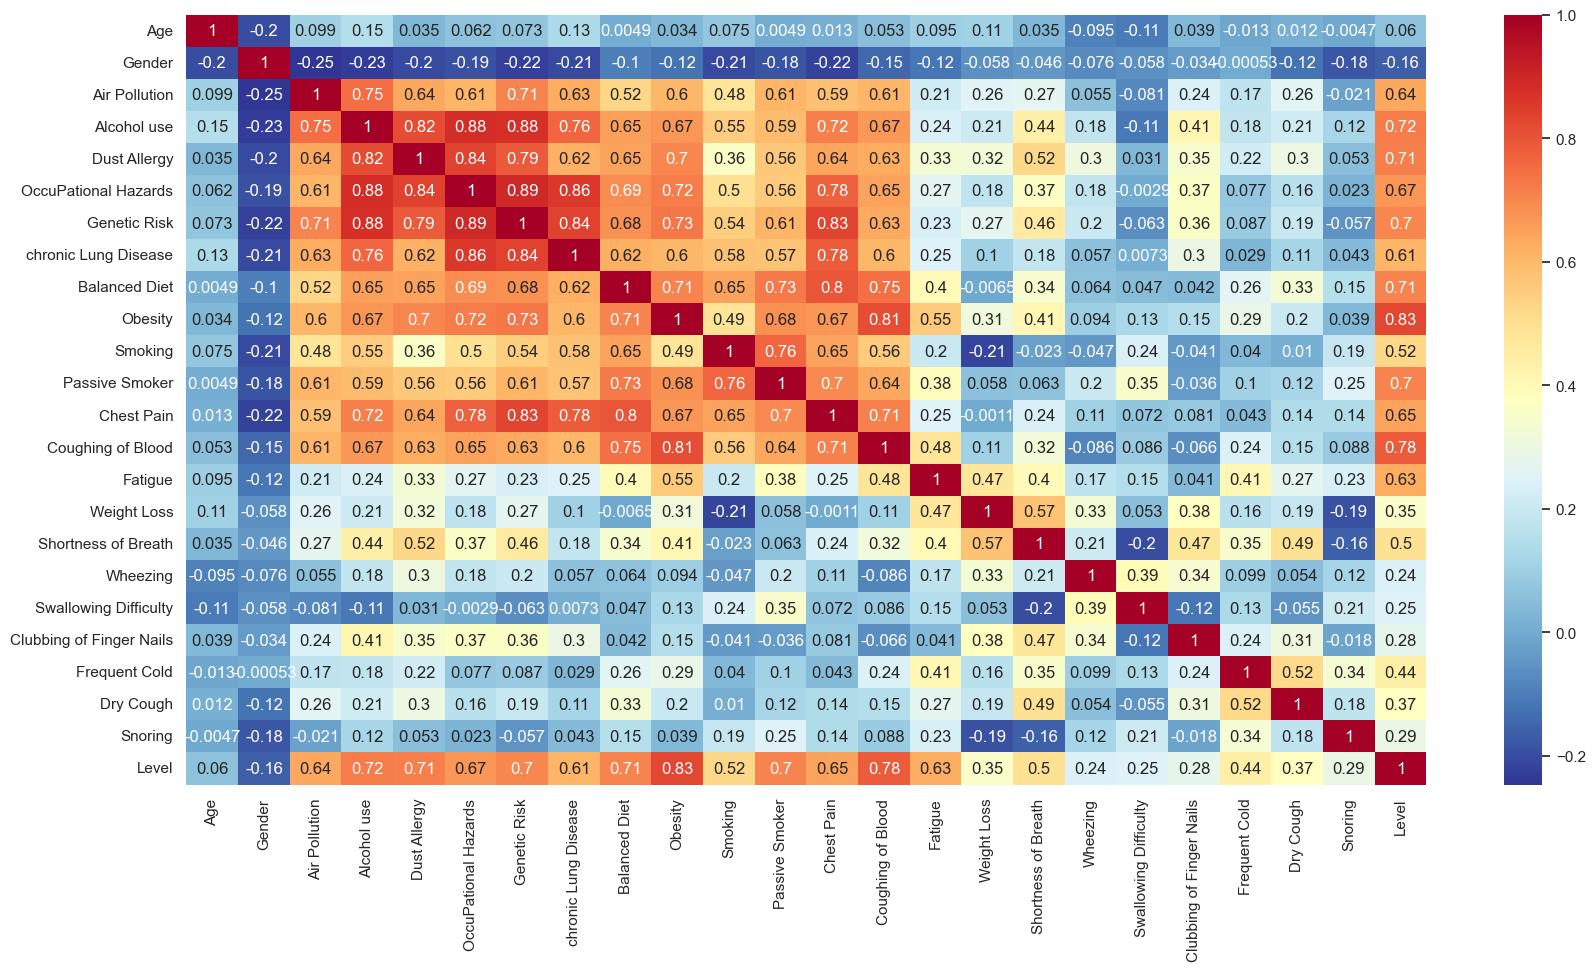

In [8]:
sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap='RdYlBu_r', annot=True)
plt.show()

Creating a heatmap of the correlation coefficients between the 'Level' column and all other columns in the DataFrame and
sorting the correlation values in descending order based on the 'Level' column.

<Axes: >

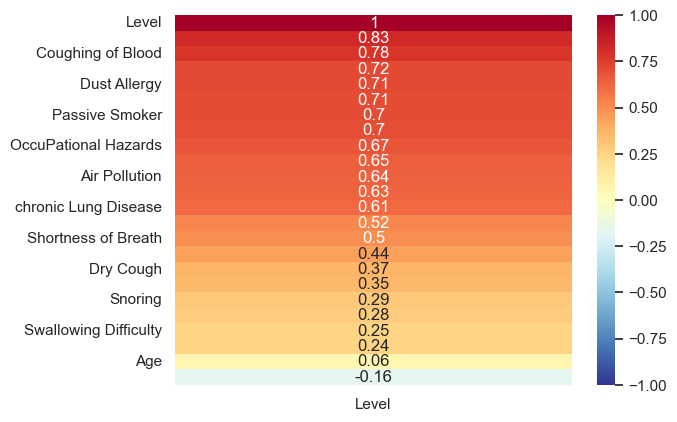

In [9]:
sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlBu_r')

In [10]:
x = df.drop("Level", axis = 1)
y = pd.get_dummies(df["Level"])

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

---

## Creating the Neural Network

<p>
A neural network is a computational model inspired by the structure and function of the human brain. It consists of interconnected nodes or artificial neurons organized into layers. Information flows through the network, with each neuron processing and transmitting data. 
</p>
Neural networks are used in machine learning and deep learning to perform tasks like pattern recognition, classification, regression, and decision-making.

#### Necessary pytorch Imports

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset

#### Neural Network logic

In [14]:
# The NeuralNetwork class is defined as a subclass of nn.Module, which is the base class for all PyTorch models.
class NeuralNetwork(nn.Module):
    # Constructor
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        # defining the layers of the neural network using the nn.Sequential container:
        self.layers = nn.Sequential(
            # input layer
            nn.Linear(input_dim, 8),
            # activation function
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            # Dropout layer : applies dropout regularization with a dropout rate of 0.1 to reduce overfitting
            nn.Dropout(0.1),
            nn.Linear(16, 8),
            nn.ReLU(),
            # Output layer
            nn.Linear(8, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.layers(x)

# Converting x and y them to torch tensors
x_tensor = torch.from_numpy(np.array(x)).float()
y_indices = np.array(y).argmax(axis=1)
y_tensor = torch.from_numpy(y_indices).long()

# Creating dataset and dataloaders
dataset = TensorDataset(x_tensor, y_tensor)
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

model = NeuralNetwork(x.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Variables used to plot the training and validation losses
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 40
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += batch_y.size(0)
        correct_train += (predicted == batch_y).sum().item()
    train_losses.append(running_train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            running_val_loss += loss.item()
            _, predicted = outputs.max(1)
            total_val += batch_y.size(0)
            correct_val += (predicted == batch_y).sum().item()
    val_losses.append(running_val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_train_loss / len(train_loader):.4f}, Val Loss: {running_val_loss / len(val_loader):.4f}, Train Accuracy: {100 * correct_train / total_train:.2f}%, Val Accuracy: {100 * correct_val / total_val:.2f}%')



Epoch [1/40], Loss: 1.0798, Val Loss: 1.0706, Train Accuracy: 47.14%, Val Accuracy: 41.67%
Epoch [2/40], Loss: 1.0545, Val Loss: 1.0443, Train Accuracy: 41.00%, Val Accuracy: 39.00%
Epoch [3/40], Loss: 1.0218, Val Loss: 1.0114, Train Accuracy: 42.14%, Val Accuracy: 42.00%
Epoch [4/40], Loss: 0.9843, Val Loss: 0.9819, Train Accuracy: 48.14%, Val Accuracy: 49.00%
Epoch [5/40], Loss: 0.9651, Val Loss: 0.9596, Train Accuracy: 52.71%, Val Accuracy: 58.33%
Epoch [6/40], Loss: 0.9518, Val Loss: 0.9415, Train Accuracy: 58.57%, Val Accuracy: 59.67%
Epoch [7/40], Loss: 0.9289, Val Loss: 0.9236, Train Accuracy: 58.57%, Val Accuracy: 62.67%
Epoch [8/40], Loss: 0.9145, Val Loss: 0.9111, Train Accuracy: 61.14%, Val Accuracy: 63.33%
Epoch [9/40], Loss: 0.8970, Val Loss: 0.8960, Train Accuracy: 62.71%, Val Accuracy: 63.33%
Epoch [10/40], Loss: 0.8843, Val Loss: 0.8823, Train Accuracy: 63.14%, Val Accuracy: 65.67%
Epoch [11/40], Loss: 0.8679, Val Loss: 0.8698, Train Accuracy: 66.86%, Val Accuracy: 69.0

#### Plotting training and validation losses

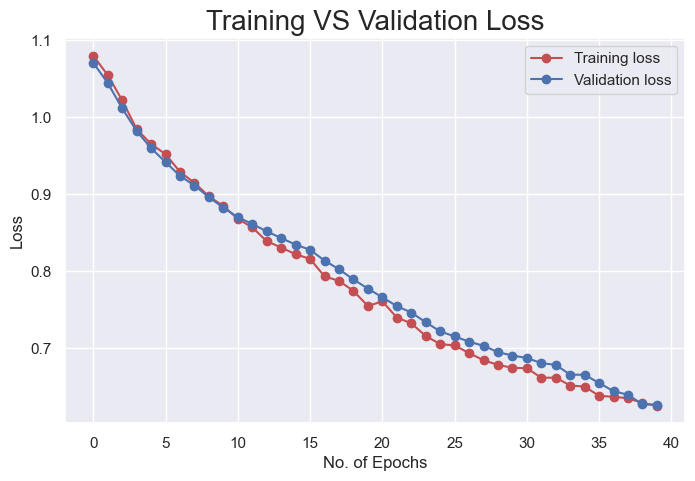

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, color="r", label="Training loss", marker="o")
plt.plot(val_losses, color="b", label="Validation loss", marker="o")
plt.title("Training VS Validation Loss", fontsize=20)
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting training and validation accuracies

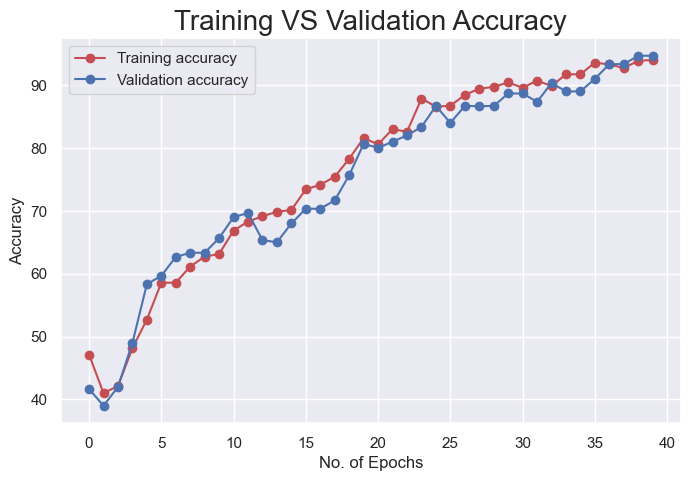

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, color="r", label="Training accuracy", marker="o")
plt.plot(val_accuracies, color="b", label="Validation accuracy", marker="o")
plt.title("Training VS Validation Accuracy", fontsize=20)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

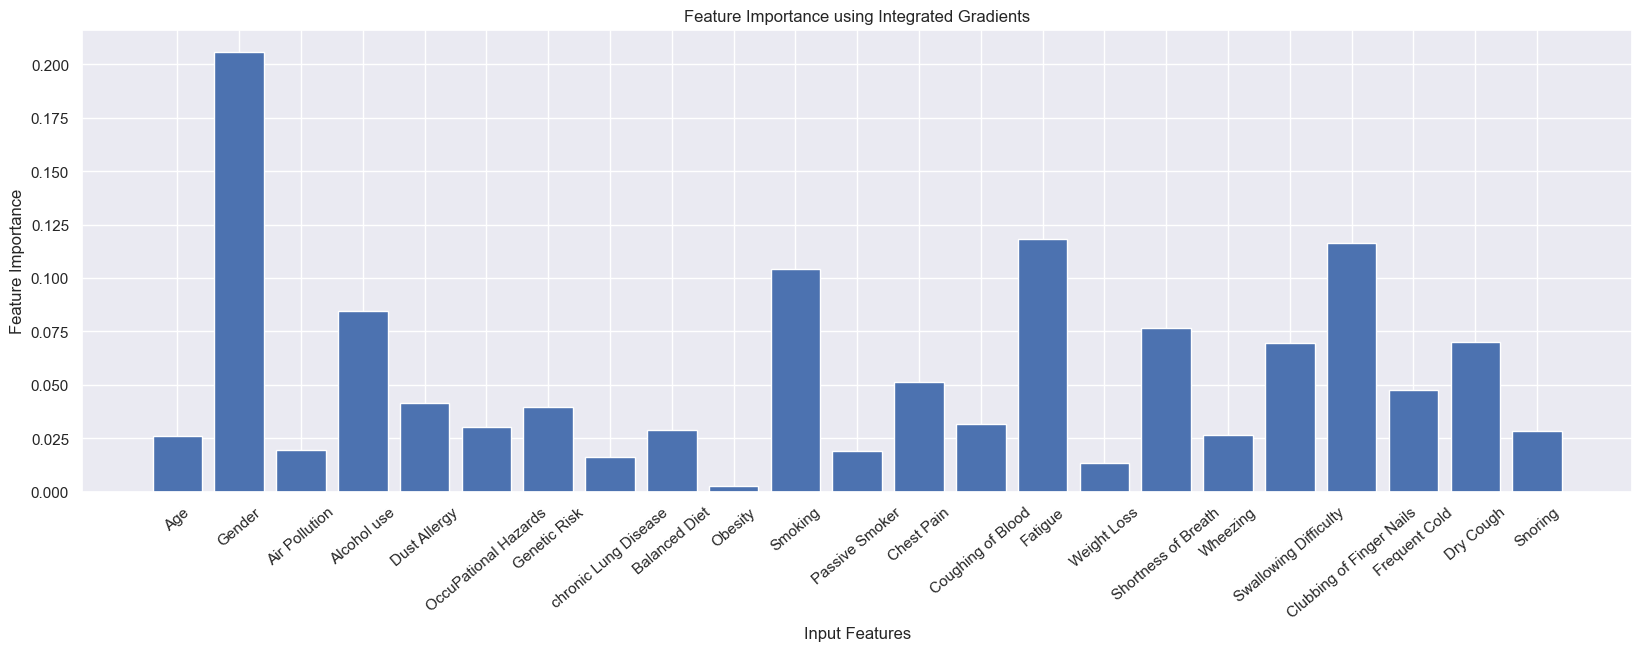

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def integrated_gradients(model, input_tensor, target_class, num_steps=50):
    model.eval()
    input_tensor.requires_grad_()
    
    # Initializomg integral approximation
    integrated_gradients = torch.zeros_like(input_tensor)
    
    # Calculating the baseline (input with all zeros)
    baseline = torch.zeros_like(input_tensor)
    
    # Calculating the scaling factor for the integral
    alpha = torch.linspace(0, 1, num_steps, device=input_tensor.device)
    
    for alpha_value in alpha:
        # Interpolating between the baseline and input
        interpolated_input = baseline + alpha_value * (input_tensor - baseline)
        outputs = model(interpolated_input)
        gradient = torch.autograd.grad(outputs[0, target_class], interpolated_input)[0]
        
        # Accumulating the gradients
        integrated_gradients += gradient
    
    # Approximating the integral using the trapezoidal rule
    feature_importance = (integrated_gradients / num_steps).abs().cpu().numpy()
    
    return feature_importance

feature_names = x.columns
sample_index = 0
input_sample = val_dataset[sample_index][0]
target_class = 0
feature_importance = integrated_gradients(model, input_sample.unsqueeze(0), target_class)

# Plotting feature importance with feature names as labels
plt.figure(figsize=(20, 6))
plt.bar(feature_names, feature_importance[0])
plt.xlabel('Input Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance using Integrated Gradients')
plt.xticks(rotation=40) 
plt.show()


### Interesting Observation
<p>
The analysis of feature importance provides valuable insights into the factors contributing to the prediction of lung cancer likelihood. Gender, fatigue, clubbing of finger nails, smoking, dry cough, alcohol use, and swallowing issues emerge as critical factors in the model's decision-making process. 
</p>
<p>
These findings can inform healthcare professionals and policymakers in designing targeted prevention and screening strategies to identify individuals at higher risk of lung cancer and potentially improve early detection and intervention efforts. However, it's essential to remember that feature importance rankings represent model behavior and should be interpreted in conjunction with domain knowledge and clinical expertise for better decision making in healthcare contexts
</p>